<a href="https://colab.research.google.com/github/sholaypompey/project-sampling/blob/main/NLP_Fundamentals_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!nvidia-smi -L

NVIDIA-SMI has failed because it couldn't communicate with the NVIDIA driver. Make sure that the latest NVIDIA driver is installed and running.



# Get helper functions

In [2]:
# Download helper functions script
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py

--2022-11-28 21:19:43--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/extras/helper_functions.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10246 (10K) [text/plain]
Saving to: ‘helper_functions.py’

helper_functions.py 100%[===================>]  10.01K  --.-KB/s    in 0s      

2022-11-28 21:19:43 (99.7 MB/s) - ‘helper_functions.py’ saved [10246/10246]



In [3]:
from helper_functions import unzip_data, create_tensorboard_callback, compare_historys, walk_through_dir, plot_loss_curves

In [4]:
# Download data (same as from Kaggle)
!wget "https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip"

# Unzip data
unzip_data("nlp_getting_started.zip")

--2022-11-28 21:19:50--  https://storage.googleapis.com/ztm_tf_course/nlp_getting_started.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.210.128, 173.194.211.128, 173.194.214.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.210.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 607343 (593K) [application/zip]
Saving to: ‘nlp_getting_started.zip’

nlp_getting_started 100%[===================>] 593.11K  --.-KB/s    in 0.005s  

2022-11-28 21:19:50 (124 MB/s) - ‘nlp_getting_started.zip’ saved [607343/607343]



# Visualizing a text data

In [5]:
import pandas as pd
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")
train_df.head()


,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [6]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [7]:
train_df.target.value_counts()

0    4342
1    3271
Name: target, dtype: int64

In [8]:
print(f"train data samples: {len(train_df)}")
print(f"test data samples: {len(test_df)}")
print(f"total samples: {len(train_df) + len(test_df)}")

train data samples: 7613
test data samples: 3263
total samples: 10876


In [9]:
# Let's reshuffle our train dataframe for surety
train_df_shuffled = train_df.sample(frac = 1, random_state = 42)
train_df_shuffled

,id,keyword,location,text,target
2644,3796,destruction,NaN,So you have a new weapon that can cause un-ima...,1
2227,3185,deluge,NaN,The f$&amp;@ing things I do for #GISHWHES Just...,0
5448,7769,police,UK,DT @georgegalloway: RT @Galloway4Mayor: ÛÏThe...,1
132,191,aftershock,NaN,Aftershock back to school kick off was great. ...,0
6845,9810,trauma,"Montgomery County, MD",in response to trauma Children of Addicts deve...,0
...,...,...,...,...,...
5226,7470,obliteration,Merica!,@Eganator2000 There aren't many Obliteration s...,0
5390,7691,panic,NaN,just had a panic attack bc I don't have enough...,0
860,1242,blood,NaN,Omron HEM-712C Automatic Blood Pressure Monito...,0
7603,10862,NaN,NaN,Officials say a quarantine is in place at an A...,1


In [10]:
# Let's visualize some randon training examples
import random
random_index = random.randint(0, len(train_df)-5)
for row in train_df_shuffled[["text", "target"]][random_index:random_index+5].itertuples():
  _, text, target = row
  print(f"target: {target}", "(real disaster)" if target > 0 else "(not real disaster)")
  print(f"text: \n{text}\n")
  print(f"id: \n{id}\n")
  print(f"......\n")

target: 0 (not real disaster)
text: 
Picking up flattened hay men (@ Masonite in Wahpeton ND) https://t.co/Kw3vq4niJQ

id: 
<built-in function id>

......

target: 1 (real disaster)
text: 
Well said Sir. My cousin was a POW. Brutally treated. Survived but never talked about it. The bombing was justified https://t.co/SuDkK1wEEZ

id: 
<built-in function id>

......

target: 1 (real disaster)
text: 
@channelstv:That's why terrorism is not d war for d army but for Intel agents who can counter their moves before they detonate their bombs.

id: 
<built-in function id>

......

target: 0 (not real disaster)
text: 
First impressions: glad hat man is leaving in lieu of more interesting ladies. Hope mudslide lady triumphs next week.

id: 
<built-in function id>

......

target: 0 (not real disaster)
text: 
https://t.co/WKv8VqVkT6 #ArtisteOfTheWeekFact say #Conversations by #coast2coastdjs agree @Crystal_Blaz 's #Jiwonle is a #HipHop #ClubBanger

id: 
<built-in function id>

......



# Split data into training and validation sets

In [11]:
from sklearn.model_selection import train_test_split
train_sentences, val_sentences, train_labels, val_labels = train_test_split(train_df_shuffled["text"].to_numpy(),
                                                                            train_df_shuffled["target"].to_numpy(),
                                                                            test_size = 0.1,
                                                                            random_state = 42)

In [12]:
train_sentences[:10], val_sentences[:10], train_labels[:10], val_labels[:10]

(array(['@mogacola @zamtriossu i screamed after hitting tweet',
        'Imagine getting flattened by Kurt Zouma',
        '@Gurmeetramrahim #MSGDoing111WelfareWorks Green S welfare force ke appx 65000 members har time disaster victim ki help ke liye tyar hai....',
        "@shakjn @C7 @Magnums im shaking in fear he's gonna hack the planet",
        'Somehow find you and I collide http://t.co/Ee8RpOahPk',
        '@EvaHanderek @MarleyKnysh great times until the bus driver held us hostage in the mall parking lot lmfao',
        'destroy the free fandom honestly',
        'Weapons stolen from National Guard Armory in New Albany still missing #Gunsense http://t.co/lKNU8902JE',
        '@wfaaweather Pete when will the heat wave pass? Is it really going to be mid month? Frisco Boy Scouts have a canoe trip in Okla.',
        'Patient-reported outcomes in long-term survivors of metastatic colorectal cancer - British Journal of Surgery http://t.co/5Yl4DC1Tqt'],
       dtype=object),
 array(['D

In [13]:
len(train_sentences), len(val_sentences), len(train_labels), len(val_labels)

(6851, 762, 6851, 762)

# Converting text into numbers

In [14]:
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization
text_vectorizer = TextVectorization(max_tokens = 10000,
                                    standardize= "lower_and_strip_punctuation",
                                    split = "whitespace",
                                    ngrams = None,
                                    output_mode = "int",
                                    output_sequence_length = 15
                                    # pad_to_max_tokens = True
                                    )

In [15]:
# Find the average tokens(words) in a vocabulary
round(sum([len(words.split()) for words in train_sentences])/len(train_sentences))

15

In [16]:
[words.split() for words in train_sentences][:2]

[['@mogacola', '@zamtriossu', 'i', 'screamed', 'after', 'hitting', 'tweet'],
 ['Imagine', 'getting', 'flattened', 'by', 'Kurt', 'Zouma']]

In [17]:
train_sentences[:2]

array(['@mogacola @zamtriossu i screamed after hitting tweet',
       'Imagine getting flattened by Kurt Zouma'], dtype=object)

In [18]:
# Fit the text vectorizer to the train sentences
text_vectorizer.adapt(train_sentences)

In [19]:
# Create sample sentences and tokenize it.
sample_sentences = "I will become the best machine learning and artificial intelligent expert in Nigeria and i will look for a way to align it with IFA divination corpus"
text_vectorizer([sample_sentences])

<tf.Tensor: shape=(1, 15), dtype=int64, numpy=
array([[   8,   38,  791,    2,  149, 2880, 2067,    7, 6191,    1, 3016,
           4, 2839,    7,    8]])>

In [20]:
# Choose a random sentences from the training sentences
random_text = random.choice(train_sentences)
print(f"Original_text : {random_text}")
print(f"\nVectorized_version: {text_vectorizer([random_text])}")

Original_text : 30 seconds for my bitches to evacuate ??????

Vectorized_version: [[ 718 1599   10   13 3149    5  279    0    0    0    0    0    0    0
     0]]


In [21]:
# Get unique words in the vocabulary
words_in_vocab = text_vectorizer.get_vocabulary()
top_5_words = words_in_vocab[:5]
bottom_5_words = words_in_vocab[-5:]
print(f"Total number of words in vocabulary: {len(words_in_vocab)}")
print(f"Top 5 words in vocabulary: {top_5_words}")
print(f"Bottom 5 words in vocabulary: {bottom_5_words}")

Total number of words in vocabulary: 10000
Top 5 words in vocabulary: ['', '[UNK]', 'the', 'a', 'in']
Bottom 5 words in vocabulary: ['pages', 'paeds', 'pads', 'padres', 'paddytomlinson1']


# Create an embedding using an embedding layer

In [22]:
import tensorflow as tf
tf.random.set_seed(42)
from tensorflow.keras import layers
embedding = layers.Embedding(input_dim = 10000,
                             output_dim = 128,
                             input_length = 15,
                             embeddings_initializer = "uniform",
                             name = "embedding_layer")
embedding

In [23]:
# Create a random setence and apply it to the embedded layers
random_sentence = random.choice(train_sentences)
print(f"Original text: {random_sentence}\n")
print(f"Vectorized text: {text_vectorizer([random_sentence])}\n")
print(f"Embedded text: \n {embedding(text_vectorizer([random_sentence]))}")

Original text: @charlesadler Ian Lee's word is like 'A fart in a windstorm'. Such a browner.

Vectorized text: [[   1 3756    1 1448    9   25    3 5669    4    3  428  666    3    1
     0]]

Embedded text: 
 [[[ 3.9779518e-02 -3.7826024e-02 -3.6462832e-02 ...  2.3625270e-03
    3.3326294e-02  2.8036680e-02]
  [-8.4698200e-05 -3.1260539e-02 -4.5992732e-03 ...  1.1693668e-02
   -2.2099067e-02 -1.3050843e-02]
  [ 3.9779518e-02 -3.7826024e-02 -3.6462832e-02 ...  2.3625270e-03
    3.3326294e-02  2.8036680e-02]
  ...
  [-4.2840134e-02 -1.4897980e-02 -1.5949596e-02 ... -1.1661064e-02
    3.0610625e-02  1.9721482e-02]
  [ 3.9779518e-02 -3.7826024e-02 -3.6462832e-02 ...  2.3625270e-03
    3.3326294e-02  2.8036680e-02]
  [ 1.6456213e-02 -5.8993213e-03 -1.4711749e-02 ... -2.5118386e-02
    9.1238134e-03 -2.4097040e-04]]]


# Modelling a text data:

More specifically, we'll be building the following:

Model 0: Naive Bayes (baseline)

Model 1: Feed-forward neural network (dense model)

Model 2: LSTM model

Model 3: GRU model

Model 4: Bidirectional-LSTM model

Model 5: 1D Convolutional Neural Network

Model 6: TensorFlow Hub Pretrained Feature Extractor

Model 7: Same as model 6 with 10% of training data

## Model 0: Getting baseline

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

model_0 = Pipeline([
    ("tfidf", TfidfVectorizer()),
    ("clf", MultinomialNB())
])
model_0.fit(train_sentences, train_labels)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [25]:
baseline_score = model_0.score(val_sentences, val_labels)
baseline_score

0.7926509186351706

In [26]:
baseline_preds = model_0.predict(val_sentences)
baseline_preds[:10]

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 0])

## Create an evaluation function for our model experiments.

In [27]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support

def calculate_results(y_true, y_preds):
  model_accuracy = accuracy_score(y_true, y_preds)
  model_precision, model_recall, model_f1score, _ = precision_recall_fscore_support(y_true, y_preds, average="weighted")
  model_results = {
      "model_accuracy": model_accuracy,
      "model_precision": model_precision,
      "model_recall": model_recall,
      "model_f1score": model_f1score
  }
  return model_results

In [28]:
baseline_results = calculate_results(val_labels, baseline_preds)
baseline_results

{'model_accuracy': 0.7926509186351706,
 'model_precision': 0.8111390004213173,
 'model_recall': 0.7926509186351706,
 'model_f1score': 0.7862189758049549}

## Model_1: A simple dense model

In [29]:
# Build model with a functional API
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype =tf.string, name="input_layer")
x = text_vectorizer(inputs)
x = embedding(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name = "model_1_dense")

In [30]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_layer (Embedding)  (None, 15, 128)          1280000   
                                                                 
 dense (Dense)               (None, 15, 1)             129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [31]:
from tensorflow.keras import layers
inputs = layers.Input(shape=(1,), dtype =tf.string, name="input_layer")
x = text_vectorizer(inputs)
x = embedding(x)
x = layers.GlobalAveragePooling1D()(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_1 = tf.keras.Model(inputs, outputs, name = "model_1_dense")

In [32]:
model_1.summary()

Model: "model_1_dense"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (InputLayer)    [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_layer (Embedding)  (None, 15, 128)          1280000   
                                                                 
 global_average_pooling1d (G  (None, 128)              0         
 lobalAveragePooling1D)                                          
                                                                 
 dense_1 (Dense)             (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
N

In [33]:
# Compile the model
model_1.compile(loss= "binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])

In [34]:
model_1_history = model_1.fit(train_sentences,
                              train_labels,
                              epochs= 5,
                              validation_data= (val_sentences, val_labels),
                              callbacks= [create_tensorboard_callback(dir_name= "model_logs", experiment_name= "dense_model_1")])

Saving TensorBoard log files to: model_logs/dense_model_1/20221128-211953
Epoch 1/5
215/215 [==============================] - 5s 17ms/step - loss: 0.6096 - accuracy: 0.6944 - val_loss: 0.5363 - val_accuracy: 0.7520
Epoch 2/5
215/215 [==============================] - 4s 19ms/step - loss: 0.4413 - accuracy: 0.8194 - val_loss: 0.4693 - val_accuracy: 0.7835
Epoch 3/5
215/215 [==============================] - 5s 23ms/step - loss: 0.3464 - accuracy: 0.8610 - val_loss: 0.4590 - val_accuracy: 0.7887
Epoch 4/5
215/215 [==============================] - 6s 28ms/step - loss: 0.2849 - accuracy: 0.8915 - val_loss: 0.4641 - val_accuracy: 0.7887
Epoch 5/5
215/215 [==============================] - 6s 28ms/step - loss: 0.2380 - accuracy: 0.9127 - val_loss: 0.4764 - val_accuracy: 0.7874


In [35]:
model_1.evaluate(val_sentences, val_labels)

24/24 [==============================] - 0s 4ms/step - loss: 0.4764 - accuracy: 0.7874


[0.47642412781715393, 0.787401556968689]

In [36]:
embedding.weights

[<tf.Variable 'embedding_layer/embeddings:0' shape=(10000, 128) dtype=float32, numpy=
 array([[ 0.00202857, -0.02155779,  0.0027522 , ..., -0.04225619,
         -0.00822864,  0.01538812],
        [ 0.03533822, -0.04215356, -0.03016874, ..., -0.0035575 ,
          0.02705194,  0.03206427],
        [ 0.01182707,  0.01262978,  0.02917518, ..., -0.06003304,
         -0.0436432 ,  0.01338253],
        ...,
        [-0.03301444, -0.0052493 , -0.04209725, ...,  0.02028764,
          0.00308807,  0.02215792],
        [ 0.00788765, -0.02609354,  0.05236164, ..., -0.05528514,
         -0.01142916,  0.04141686],
        [-0.03701388, -0.07432979,  0.05488915, ..., -0.02050988,
         -0.08764113,  0.02116849]], dtype=float32)>]

In [37]:
embed_weights = model_1.get_layer("embedding_layer").get_weights()[0]
print(embed_weights.shape)

(10000, 128)


In [38]:
model_1_pred_probs = model_1.predict(val_sentences)
model_1_pred_probs[:10]

24/24 [==============================] - 0s 4ms/step


array([[0.41302982],
       [0.74585366],
       [0.99772674],
       [0.10819986],
       [0.10324275],
       [0.9357347 ],
       [0.9114057 ],
       [0.9930875 ],
       [0.9687747 ],
       [0.26211113]], dtype=float32)

In [39]:
model_1_preds = tf.squeeze(tf.round(model_1_pred_probs))
model_1_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [40]:
model_1_results = calculate_results(val_labels, model_1_preds)
model_1_results

{'model_accuracy': 0.7874015748031497,
 'model_precision': 0.7914920592553047,
 'model_recall': 0.7874015748031497,
 'model_f1score': 0.7846966492209201}

In [41]:
baseline_results

{'model_accuracy': 0.7926509186351706,
 'model_precision': 0.8111390004213173,
 'model_recall': 0.7926509186351706,
 'model_f1score': 0.7862189758049549}

In [42]:
# Compare our baseline model results to our new model results
import numpy as np
np.array(list(model_1_results.values())) > np.array(list(baseline_results.values()))

array([False, False, False, False])

In [43]:
# Define a fuction to compare new model results to baseline model results
def compare_results(baseline_results, new_model_results):
  for key, value in baseline_results.items():
    print(f"Baseline {key}: {value:.2f}, New {key}: {new_model_results[key]:.2f}, Difference {new_model_results[key]- value:.2f}")

In [44]:
compare_results(baseline_results, model_1_results)

Baseline model_accuracy: 0.79, New model_accuracy: 0.79, Difference -0.01
Baseline model_precision: 0.81, New model_precision: 0.79, Difference -0.02
Baseline model_recall: 0.79, New model_recall: 0.79, Difference -0.01
Baseline model_f1score: 0.79, New model_f1score: 0.78, Difference -0.00


In [45]:
for key, value in model_1_results.items():
  print(key, value)

model_accuracy 0.7874015748031497
model_precision 0.7914920592553047
model_recall 0.7874015748031497
model_f1score 0.7846966492209201


# Recurrent Neural Networks(RNNs)

## Model_2 LSTM

In [46]:
tf.random.set_seed(42)
import tensorflow as tf
from tensorflow.keras import layers
embedding_2 = layers.Embedding(input_dim= 10000,
                              output_dim= 128,
                              embeddings_initializer= "uniform",
                              input_length= 15,
                              name= "embedding_2_layer")

# Create LSTM model
inputs = layers.Input(shape=(1,), dtype="string")
x = text_vectorizer(inputs)
x = embedding_2(x)
print(x.shape)
x  = layers.LSTM(64)(x)
print(x.shape)
outputs = layers.Dense(1, activation= "sigmoid", name= "output_layer_2")(x)
model_2 = tf.keras.Model(inputs, outputs, name="lstm_model_2")

(None, 15, 128)
(None, 64)


In [47]:
model_2.compile(loss= "binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])
model_2_history = model_2.fit(train_sentences,
                              train_labels,
                              epochs= 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback("model_logs","lstm_model_2")])

Saving TensorBoard log files to: model_logs/lstm_model_2/20221128-212037
Epoch 1/5
215/215 [==============================] - 10s 31ms/step - loss: 0.5100 - accuracy: 0.7416 - val_loss: 0.4566 - val_accuracy: 0.7822
Epoch 2/5
215/215 [==============================] - 11s 54ms/step - loss: 0.3176 - accuracy: 0.8717 - val_loss: 0.5138 - val_accuracy: 0.7756
Epoch 3/5
215/215 [==============================] - 11s 50ms/step - loss: 0.2201 - accuracy: 0.9152 - val_loss: 0.5858 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 7s 33ms/step - loss: 0.1556 - accuracy: 0.9428 - val_loss: 0.6041 - val_accuracy: 0.7743
Epoch 5/5
215/215 [==============================] - 14s 65ms/step - loss: 0.1076 - accuracy: 0.9594 - val_loss: 0.8746 - val_accuracy: 0.7507


In [48]:
model_2.summary()

Model: "lstm_model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_2_layer (Embeddin  (None, 15, 128)          1280000   
 g)                                                              
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 output_layer_2 (Dense)      (None, 1)                 65        
                                                                 
Total params: 1,329,473
Trainable params: 1,329,473
No

In [49]:
# Predict on model_2
model_2_pred_probs = model_2.predict(val_sentences)
model_2_pred_probs[:10]

24/24 [==============================] - 1s 5ms/step


array([[0.00712613],
       [0.7873692 ],
       [0.99963766],
       [0.05679176],
       [0.0025822 ],
       [0.9996238 ],
       [0.92170185],
       [0.9997993 ],
       [0.99949545],
       [0.6645742 ]], dtype=float32)

In [50]:
model_2_preds = tf.squeeze(tf.round(model_2_pred_probs))
model_2_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1.], dtype=float32)>

In [51]:
# Check results
model_2_results = calculate_results(val_labels, model_2_preds)
model_2_results

{'model_accuracy': 0.7506561679790026,
 'model_precision': 0.7510077975908164,
 'model_recall': 0.7506561679790026,
 'model_f1score': 0.7489268622514025}

In [52]:
# Compare results with baseline model
model_2_results_comp = compare_results(baseline_results, model_2_results)
model_2_results_comp

Baseline model_accuracy: 0.79, New model_accuracy: 0.75, Difference -0.04
Baseline model_precision: 0.81, New model_precision: 0.75, Difference -0.06
Baseline model_recall: 0.79, New model_recall: 0.75, Difference -0.04
Baseline model_f1score: 0.79, New model_f1score: 0.75, Difference -0.04


## Model 3: GRU

In [53]:
tf.random.set_seed(42)  # For reproducibility
from tensorflow.keras import layers
embedding_3 = layers.Embedding(input_dim= 10000,
                               output_dim= 128,
                               input_length= 15,
                               embeddings_initializer= "uniform",
                               name= "model_3_embedding")
# Create GRU model
inputs = layers.Input(shape=(1,), dtype= tf.string)
x = text_vectorizer(inputs)
x = embedding_3(x)
print(x.shape)
#x = layers.GRU(64, return_sequences = True)(x) # Always remember to return sequences if you want to stack models
x = layers.GRU(64)(x)
print(x.shape)
x = layers.Dense(1, activation="relu")(x)
print(x.shape)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_3 = tf.keras.Model(inputs, outputs, name= "model_3_gru")

(None, 15, 128)
(None, 64)
(None, 1)


In [54]:
model_3.summary()

Model: "model_3_gru"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 model_3_embedding (Embeddin  (None, 15, 128)          1280000   
 g)                                                              
                                                                 
 gru (GRU)                   (None, 64)                37248     
                                                                 
 dense_2 (Dense)             (None, 1)                 65        
                                                                 
 dense_3 (Dense)             (None, 1)                 

In [55]:
model_3.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])
# Fit the model
model_3_history = model_3.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks= [create_tensorboard_callback("model_logs", "model_3_GRU")])

Saving TensorBoard log files to: model_logs/model_3_GRU/20221128-212204
Epoch 1/5
215/215 [==============================] - 9s 29ms/step - loss: 0.6528 - accuracy: 0.6452 - val_loss: 0.5740 - val_accuracy: 0.7310
Epoch 2/5
215/215 [==============================] - 6s 27ms/step - loss: 0.5312 - accuracy: 0.7977 - val_loss: 0.5212 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 6s 28ms/step - loss: 0.4378 - accuracy: 0.8540 - val_loss: 0.5093 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 7s 32ms/step - loss: 0.3868 - accuracy: 0.8751 - val_loss: 0.5000 - val_accuracy: 0.7703
Epoch 5/5
215/215 [==============================] - 8s 36ms/step - loss: 0.3528 - accuracy: 0.8850 - val_loss: 0.5273 - val_accuracy: 0.7612


In [56]:
# predict on model 3
model_3_pred_probs = model_3.predict(val_sentences)
model_3_pred_probs[:10]


24/24 [==============================] - 1s 4ms/step


array([[0.28911775],
       [0.60907507],
       [0.99985313],
       [0.28911775],
       [0.28911775],
       [0.9991528 ],
       [0.99841297],
       [0.9997363 ],
       [0.9983878 ],
       [0.28911775]], dtype=float32)

In [57]:
model_3_preds = tf.squeeze(tf.round(model_3_pred_probs))
model_3_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [58]:
# Check result
model_3_results = calculate_results(val_labels, model_3_preds)
model_3_results

{'model_accuracy': 0.7611548556430446,
 'model_precision': 0.7853048880051002,
 'model_recall': 0.7611548556430446,
 'model_f1score': 0.7511087301507081}

In [59]:
# Compare result with baseline results
compare_results(baseline_results, model_3_results)

Baseline model_accuracy: 0.79, New model_accuracy: 0.76, Difference -0.03
Baseline model_precision: 0.81, New model_precision: 0.79, Difference -0.03
Baseline model_recall: 0.79, New model_recall: 0.76, Difference -0.03
Baseline model_f1score: 0.79, New model_f1score: 0.75, Difference -0.04


## Model 4: Bidirectional RNN model

In [60]:
tf.random.set_seed(42)
from tensorflow.keras import layers
embedding_4 = layers.Embedding(input_dim= 10000,
                               output_dim= 128,
                               embeddings_initializer= "uniform",
                               input_length= 15,
                               name= "embedding_model_4_layer")
# Create Bidirectional RNN model
inputs = layers.Input(shape=(1,), dtype = tf.string)
x = text_vectorizer(inputs)
x = embedding_4(x)
x = layers.Bidirectional(layers.LSTM(64))(x)
outputs = layers.Dense(1, activation="sigmoid")(x)
model_4 = tf.keras.Model(inputs, outputs, name="model_4_Bidirectional")

In [61]:
# compile model
model_4.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])
# Fit the model
model_4_history = model_4.fit(train_sentences,
            train_labels,
            epochs= 5,
            validation_data= (val_sentences, val_labels),
            callbacks= [create_tensorboard_callback("model_logs", "model_4_bidirectional")])

Saving TensorBoard log files to: model_logs/model_4_bidirectional/20221128-212248
Epoch 1/5
215/215 [==============================] - 13s 42ms/step - loss: 0.5093 - accuracy: 0.7481 - val_loss: 0.4606 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 8s 39ms/step - loss: 0.3135 - accuracy: 0.8708 - val_loss: 0.5144 - val_accuracy: 0.7690
Epoch 3/5
215/215 [==============================] - 10s 45ms/step - loss: 0.2150 - accuracy: 0.9178 - val_loss: 0.5626 - val_accuracy: 0.7677
Epoch 4/5
215/215 [==============================] - 10s 44ms/step - loss: 0.1523 - accuracy: 0.9469 - val_loss: 0.6365 - val_accuracy: 0.7769
Epoch 5/5
215/215 [==============================] - 10s 48ms/step - loss: 0.1083 - accuracy: 0.9639 - val_loss: 0.6509 - val_accuracy: 0.7664


In [62]:
model_4.summary()

Model: "model_4_Bidirectional"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_model_4_layer (Em  (None, 15, 128)          1280000   
 bedding)                                                        
                                                                 
 bidirectional (Bidirectiona  (None, 128)              98816     
 l)                                                              
                                                                 
 dense_4 (Dense)             (None, 1)                 129       
                                             

In [63]:
# predict on new model
model_4_pred_probs = model_4.predict(val_sentences)
model_4_pred_probs[:10]

24/24 [==============================] - 1s 8ms/step


array([[0.04000105],
       [0.82792675],
       [0.99842227],
       [0.13531165],
       [0.00311334],
       [0.99220747],
       [0.95528466],
       [0.9994564 ],
       [0.99898285],
       [0.2814178 ]], dtype=float32)

In [64]:
model_4_preds = tf.squeeze(tf.round(model_4_pred_probs))
model_4_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [65]:
# check result
model_4_results = calculate_results(val_labels, model_4_preds)
model_4_results

{'model_accuracy': 0.7664041994750657,
 'model_precision': 0.7665895370389821,
 'model_recall': 0.7664041994750657,
 'model_f1score': 0.7651213533864446}

In [66]:
# compare results
compare_results(baseline_results, model_4_results)

Baseline model_accuracy: 0.79, New model_accuracy: 0.77, Difference -0.03
Baseline model_precision: 0.81, New model_precision: 0.77, Difference -0.04
Baseline model_recall: 0.79, New model_recall: 0.77, Difference -0.03
Baseline model_f1score: 0.79, New model_f1score: 0.77, Difference -0.02


# Convolutional Neural Network CNN

## Model 5: CNN

In [67]:
tf.random.set_seed(42)
from tensorflow.keras import layers
embedding_5 = layers.Embedding(input_dim= 10000,
                               output_dim= 128,
                               embeddings_initializer= "uniform",
                               input_length= 15,
                               name= "embedding_5_layer")
# Create CNN model
inputs = layers.Input(shape=(1,), dtype= "string")
x = text_vectorizer(inputs)
x = embedding_5(x)
x = layers.Conv1D(filters=32, kernel_size = 5, activation= "relu")(x)
print(x.shape)
x = layers.GlobalMaxPool1D()(x)
print(x.shape)
outputs = layers.Dense(1, activation= "sigmoid")(x)
model_5 = tf.keras.Model(inputs, outputs, name = "model_5_CNN")

# Compile the model
model_5.compile(loss= "binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])
model_5.summary()

(None, 11, 32)
(None, 32)
Model: "model_5_CNN"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 1)]               0         
                                                                 
 text_vectorization (TextVec  (None, 15)               0         
 torization)                                                     
                                                                 
 embedding_5_layer (Embeddin  (None, 15, 128)          1280000   
 g)                                                              
                                                                 
 conv1d (Conv1D)             (None, 11, 32)            20512     
                                                                 
 global_max_pooling1d (Globa  (None, 32)               0         
 lMaxPooling1D)                                                  
                             

In [68]:
# Fit the model
model_5_history = model_5.fit(train_sentences,
                              train_labels,
                              epochs = 5,
                              validation_data= (val_sentences, val_labels),
                              callbacks = [create_tensorboard_callback("model_logs", "model_5_Conv1D")])

Saving TensorBoard log files to: model_logs/model_5_Conv1D/20221128-212341
Epoch 1/5
215/215 [==============================] - 5s 21ms/step - loss: 0.5652 - accuracy: 0.7141 - val_loss: 0.4733 - val_accuracy: 0.7795
Epoch 2/5
215/215 [==============================] - 5s 25ms/step - loss: 0.3380 - accuracy: 0.8615 - val_loss: 0.4758 - val_accuracy: 0.7730
Epoch 3/5
215/215 [==============================] - 5s 24ms/step - loss: 0.2070 - accuracy: 0.9234 - val_loss: 0.5457 - val_accuracy: 0.7730
Epoch 4/5
215/215 [==============================] - 6s 27ms/step - loss: 0.1314 - accuracy: 0.9578 - val_loss: 0.6163 - val_accuracy: 0.7730
Epoch 5/5
215/215 [==============================] - 4s 20ms/step - loss: 0.0933 - accuracy: 0.9691 - val_loss: 0.6779 - val_accuracy: 0.7782


In [69]:
model_5_pred_probs = model_5.predict(val_sentences)
model_5_pred_probs[:10]

24/24 [==============================] - 0s 5ms/step


array([[0.225345  ],
       [0.7534111 ],
       [0.99956024],
       [0.05562787],
       [0.01449854],
       [0.98585176],
       [0.98418933],
       [0.99758804],
       [0.9986262 ],
       [0.26914364]], dtype=float32)

In [70]:
model_5_preds = tf.squeeze(tf.round(model_5_pred_probs))
model_5_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0.], dtype=float32)>

In [71]:
model_5_results = calculate_results(val_labels, model_5_preds)
model_5_results

{'model_accuracy': 0.7782152230971129,
 'model_precision': 0.7807522349051432,
 'model_recall': 0.7782152230971129,
 'model_f1score': 0.7758810170952618}

In [72]:
compare_results(baseline_results, model_5_results)

Baseline model_accuracy: 0.79, New model_accuracy: 0.78, Difference -0.01
Baseline model_precision: 0.81, New model_precision: 0.78, Difference -0.03
Baseline model_recall: 0.79, New model_recall: 0.78, Difference -0.01
Baseline model_f1score: 0.79, New model_f1score: 0.78, Difference -0.01


# Using Pretrained Embeddings(Transfer Learning for NLP)

## Model 6:Tensorflow Hub Pretrained Sentence Enconder

In [73]:
# We can use this encoding layer in place of our text_vectorizer and embedding layer
import tensorflow_hub as hub
sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[], # shape of inputs coming to our model 
                                        dtype=tf.string, # data type of inputs coming to the USE layer
                                        trainable=False, # keep the pretrained weights (we'll create a feature extractor)
                                        name="USE") 

In [74]:
# Use Sequential API
model_6 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name = "model_6_tfhub")
# compile model
model_6.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])
model_6.summary()

Model: "model_6_tfhub"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_6 (Dense)             (None, 64)                32832     
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [75]:
model_6_history = model_6.fit(train_sentences,
                              train_labels,
                              epochs= 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks= [create_tensorboard_callback("model_logs", "model_6_USE")])

Saving TensorBoard log files to: model_logs/model_6_USE/20221128-212442
Epoch 1/5
215/215 [==============================] - 7s 16ms/step - loss: 0.5008 - accuracy: 0.7892 - val_loss: 0.4478 - val_accuracy: 0.7966
Epoch 2/5
215/215 [==============================] - 3s 16ms/step - loss: 0.4144 - accuracy: 0.8133 - val_loss: 0.4369 - val_accuracy: 0.8058
Epoch 3/5
215/215 [==============================] - 3s 15ms/step - loss: 0.3998 - accuracy: 0.8212 - val_loss: 0.4329 - val_accuracy: 0.8110
Epoch 4/5
215/215 [==============================] - 4s 19ms/step - loss: 0.3925 - accuracy: 0.8266 - val_loss: 0.4288 - val_accuracy: 0.8110
Epoch 5/5
215/215 [==============================] - 6s 29ms/step - loss: 0.3860 - accuracy: 0.8276 - val_loss: 0.4309 - val_accuracy: 0.8123


In [76]:
model_6_pred_probs = model_6.predict(val_sentences)
model_6_pred_probs[:10]

24/24 [==============================] - 1s 15ms/step


array([[0.14443198],
       [0.7271504 ],
       [0.9856655 ],
       [0.1974092 ],
       [0.73417026],
       [0.6859664 ],
       [0.9808888 ],
       [0.9741102 ],
       [0.91573215],
       [0.08070084]], dtype=float32)

In [77]:
model_6_preds = tf.squeeze(tf.round(model_6_pred_probs))
model_6_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [78]:
model_6_results = calculate_results(val_labels, model_6_preds)
model_6_results

{'model_accuracy': 0.8123359580052494,
 'model_precision': 0.8148798668657973,
 'model_recall': 0.8123359580052494,
 'model_f1score': 0.810686575717776}

In [79]:
compare_results(baseline_results, model_6_results)

Baseline model_accuracy: 0.79, New model_accuracy: 0.81, Difference 0.02
Baseline model_precision: 0.81, New model_precision: 0.81, Difference 0.00
Baseline model_recall: 0.79, New model_recall: 0.81, Difference 0.02
Baseline model_f1score: 0.79, New model_f1score: 0.81, Difference 0.02


## Model 7: Tensorflow Hub Pretrained Sentence Encoder 10% of training

In [80]:
# Use train_test_split method to split our data
train_sentences_90per, train_sentences_10per, train_labels_90per, train_labels_10per = train_test_split(np.array(train_sentences),
                                                                                                        train_labels,
                                                                                                        test_size= 0.1,
                                                                                                        random_state= 42)
len(train_sentences_90per), len(train_sentences_10per), len(train_labels_90per), len(train_labels_10per)

(6165, 686, 6165, 686)

In [81]:
train_sentences_10per[:10]

array(['Families to sue over Legionnaires: More than 40 families affected by the fatal outbreak o... http://t.co/3hTJ2PypSg #News #check #follow',
       "@Jones94Kyle now I've said all this he's dead and no one else dies",
       '@argentings WE COULD HAVE HAD IT AAAAAAALLLL I\x89Ûªm not even on that season and I\x89Ûªm devastated',
       "Map: Typhoon Soudelor's predicted path as it approaches Taiwan; expected to make landfall over southern China by S\x89Û_ http://t.co/0XCb7yeqmw",
       "So when r u getting married'@Foxy__Siren: Oh finally Jennifer Aniston got married??????... I'm so happy for her ??????'",
       'Real people. True stories. Real pain &amp; suffering. #displaced #RefugeesMatter #Syria  https://t.co/OEZ7O9AB2C',
       'dust storm in riyadh ????',
       "@AlexAllTimeLow awwww they're on an airplane accident and they're gonna die what a cuties ???? good job!",
       '@joshcorman  #infosec rather you knew it or not your a firefighter  now days  you often  run into 

In [82]:
# We want to run the 10% on the same model 6 that we run the full data on, so we need to clone model_6
model_7 = tf.keras.Sequential([
    sentence_encoder_layer,
    layers.Dense(64, activation="relu"),
    layers.Dense(1, activation="sigmoid")
], name = "model_7_tfhub")
# compile model
model_7.compile(loss="binary_crossentropy",
                optimizer= tf.keras.optimizers.Adam(),
                metrics= ["accuracy"])
model_7.summary()

Model: "model_7_tfhub"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 USE (KerasLayer)            (None, 512)               256797824 
                                                                 
 dense_8 (Dense)             (None, 64)                32832     
                                                                 
 dense_9 (Dense)             (None, 1)                 65        
                                                                 
Total params: 256,830,721
Trainable params: 32,897
Non-trainable params: 256,797,824
_________________________________________________________________


In [83]:
model_7_history = model_7.fit(train_sentences_10per,
                              train_labels_10per,
                              epochs= 5,
                              validation_data = (val_sentences, val_labels),
                              callbacks= [create_tensorboard_callback("model_logs", "model_7_USE")])

Saving TensorBoard log files to: model_logs/model_7_USE/20221128-212527
Epoch 1/5
22/22 [==============================] - 7s 217ms/step - loss: 0.6716 - accuracy: 0.6574 - val_loss: 0.6526 - val_accuracy: 0.6903
Epoch 2/5
22/22 [==============================] - 1s 65ms/step - loss: 0.5972 - accuracy: 0.8032 - val_loss: 0.5944 - val_accuracy: 0.7362
Epoch 3/5
22/22 [==============================] - 1s 58ms/step - loss: 0.5178 - accuracy: 0.8149 - val_loss: 0.5398 - val_accuracy: 0.7625
Epoch 4/5
22/22 [==============================] - 1s 58ms/step - loss: 0.4526 - accuracy: 0.8265 - val_loss: 0.5084 - val_accuracy: 0.7677
Epoch 5/5
22/22 [==============================] - 1s 27ms/step - loss: 0.4094 - accuracy: 0.8382 - val_loss: 0.4915 - val_accuracy: 0.7703


In [84]:
model_7_pred_probs = model_7.predict(val_sentences)
model_7_pred_probs[:10]

24/24 [==============================] - 1s 14ms/step


array([[0.24043253],
       [0.7683783 ],
       [0.9013718 ],
       [0.2906796 ],
       [0.57149976],
       [0.8356513 ],
       [0.8062942 ],
       [0.83358157],
       [0.85545665],
       [0.11749935]], dtype=float32)

In [85]:
model_7_preds = tf.squeeze(tf.round(model_7_pred_probs))
model_7_preds[:10]

<tf.Tensor: shape=(10,), dtype=float32, numpy=array([0., 1., 1., 0., 1., 1., 1., 1., 1., 0.], dtype=float32)>

In [86]:
model_7_results = calculate_results(val_labels, model_7_preds)
model_7_results

{'model_accuracy': 0.7703412073490814,
 'model_precision': 0.7755630249535594,
 'model_recall': 0.7703412073490814,
 'model_f1score': 0.7667059443150692}

In [87]:
compare_results(baseline_results, model_7_results)

Baseline model_accuracy: 0.79, New model_accuracy: 0.77, Difference -0.02
Baseline model_precision: 0.81, New model_precision: 0.78, Difference -0.04
Baseline model_recall: 0.79, New model_recall: 0.77, Difference -0.02
Baseline model_f1score: 0.79, New model_f1score: 0.77, Difference -0.02


# Comparing the performance of each of our models

In [88]:
# Combine model results into a DataFrame
all_model_results = pd.DataFrame({"baseline": baseline_results,
                                  "simple_dense": model_1_results,
                                  "lstm": model_2_results,
                                  "gru": model_3_results,
                                  "bidirectional": model_4_results,
                                  "conv1d": model_5_results,
                                  "tf_hub_sentence_encoder": model_6_results,
                                  "tf_hub_10_percent_data": model_7_results})
all_model_results = all_model_results.transpose()
all_model_results

,model_accuracy,model_precision,model_recall,model_f1score
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.787402,0.791492,0.787402,0.784697
lstm,0.750656,0.751008,0.750656,0.748927
gru,0.761155,0.785305,0.761155,0.751109
bidirectional,0.766404,0.766590,0.766404,0.765121
conv1d,0.778215,0.780752,0.778215,0.775881
tf_hub_sentence_encoder,0.812336,0.814880,0.812336,0.810687
tf_hub_10_percent_data,0.770341,0.775563,0.770341,0.766706


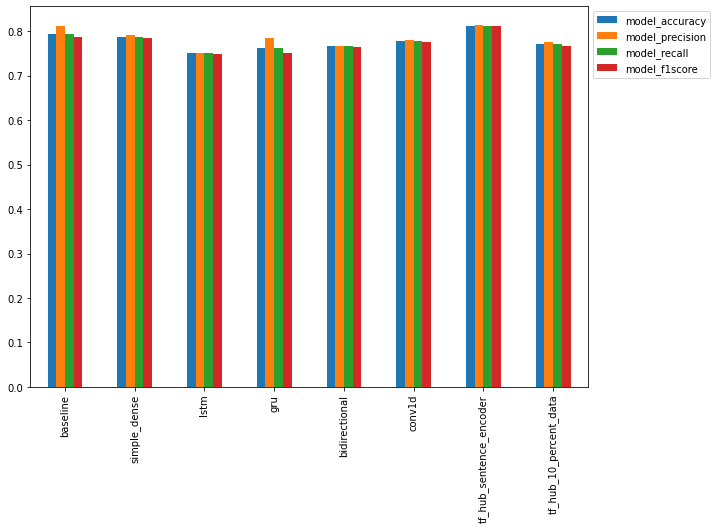

In [89]:
# Visualize our all model results
all_model_results.plot(kind= "bar", figsize=(10,7)).legend(bbox_to_anchor=(1.0,1.0));

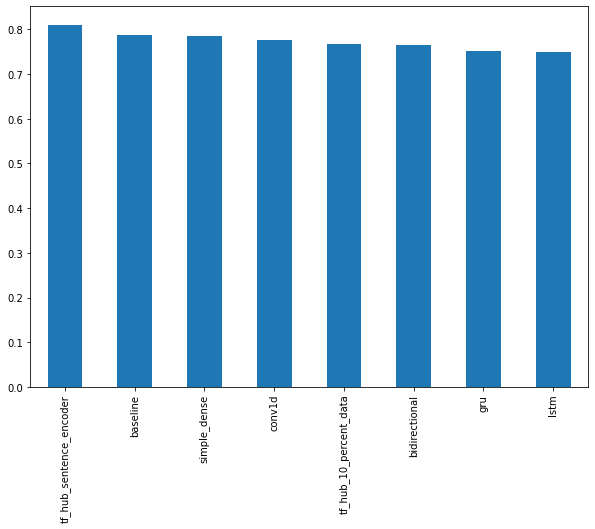

In [90]:
# Sort model result by f1 score since it is the combination of precision and recall
all_model_results.sort_values("model_f1score", ascending= False)["model_f1score"].plot(kind="bar", figsize= (10,7));

In [91]:
# View tensorboard logs of transfer learning modelling experiments (should be 4 models)
#  Upload TensorBoard dev records
#!tensorboard dev upload --logdir ./model_logs \
#   --description "A series of different NLP modellings experiments with various models" \
#   --one_shot # exits the uploader when upload has finished

# Combining our models(model ensembling/stacking)

In [92]:
baseline_pred_probs = np.max(model_0.predict_proba(val_sentences), axis=1)
baseline_pred_probs[:10]

array([0.55507546, 0.70165655, 0.86646023, 0.78011348, 0.63190603,
       0.8216631 , 0.5759222 , 0.90335826, 0.73121414, 0.82175747])

In [93]:
combined_pred_probs = baseline_pred_probs + tf.squeeze(model_2_pred_probs) + tf.squeeze(model_6_pred_probs)
combined_preds = tf.round(combined_pred_probs/3)
combined_preds[:20]

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 1.], dtype=float32)>

In [94]:
ensembled_results = calculate_results(val_labels, combined_preds)
ensembled_results

{'model_accuracy': 0.7808398950131233,
 'model_precision': 0.7805216999297674,
 'model_recall': 0.7808398950131233,
 'model_f1score': 0.7805169025578647}

In [95]:
compare_results(baseline_results, ensembled_results)

Baseline model_accuracy: 0.79, New model_accuracy: 0.78, Difference -0.01
Baseline model_precision: 0.81, New model_precision: 0.78, Difference -0.03
Baseline model_recall: 0.79, New model_recall: 0.78, Difference -0.01
Baseline model_f1score: 0.79, New model_f1score: 0.78, Difference -0.01


In [96]:
all_model_results

,model_accuracy,model_precision,model_recall,model_f1score
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.787402,0.791492,0.787402,0.784697
lstm,0.750656,0.751008,0.750656,0.748927
gru,0.761155,0.785305,0.761155,0.751109
bidirectional,0.766404,0.766590,0.766404,0.765121
conv1d,0.778215,0.780752,0.778215,0.775881
tf_hub_sentence_encoder,0.812336,0.814880,0.812336,0.810687
tf_hub_10_percent_data,0.770341,0.775563,0.770341,0.766706


In [97]:
# Let's add our ensembled results to all model results
all_model_results.loc["ensembled_results"] = ensembled_results

In [98]:
all_model_results

,model_accuracy,model_precision,model_recall,model_f1score
baseline,0.792651,0.811139,0.792651,0.786219
simple_dense,0.787402,0.791492,0.787402,0.784697
lstm,0.750656,0.751008,0.750656,0.748927
gru,0.761155,0.785305,0.761155,0.751109
bidirectional,0.766404,0.766590,0.766404,0.765121
conv1d,0.778215,0.780752,0.778215,0.775881
tf_hub_sentence_encoder,0.812336,0.814880,0.812336,0.810687
tf_hub_10_percent_data,0.770341,0.775563,0.770341,0.766706
ensembled_results,0.780840,0.780522,0.780840,0.780517


# Saving and loading a trained model

In [99]:
# Saving with HDF% format
model_6.save("model_6.h5")

In [100]:
# Load saved model
loaded_model_6 = tf.keras.models.load_model("model_6.h5", custom_objects={"KerasLayer": hub.KerasLayer})

In [101]:
loaded_model_6.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 22ms/step - loss: 0.4309 - accuracy: 0.8123


[0.43088313937187195, 0.8123359680175781]

In [102]:
# Saving with save model format (default)
model_6.save("model_6_smf")

In [103]:
model_6_savedmodel = tf.keras.models.load_model("model_6_smf")

In [104]:
model_6_savedmodel.evaluate(val_sentences, val_labels)

24/24 [==============================] - 1s 18ms/step - loss: 0.4309 - accuracy: 0.8123


[0.43088313937187195, 0.8123359680175781]

# Finding the most wrong examples

In [105]:
val_df = pd.DataFrame({"text": val_sentences,
                       "target": val_labels,
                       "preds": model_6_preds,
                       "pred_probs": tf.squeeze(model_6_pred_probs)})
val_df[:10]

,text,target,preds,pred_probs
0,DFR EP016 Monthly Meltdown - On Dnbheaven 2015...,0,0.0,0.144432
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.727150
2,Gunmen kill four in El Salvador bus attack: Su...,1,1.0,0.985666
3,@camilacabello97 Internally and externally scr...,1,0.0,0.197409
4,Radiation emergency #preparedness starts with ...,1,1.0,0.734170
5,Investigators rule catastrophic structural fai...,1,1.0,0.685966
6,How the West was burned: Thousands of wildfire...,1,1.0,0.980889
7,Map: Typhoon Soudelor's predicted path as it a...,1,1.0,0.974110
8,Ûª93 blasts accused Yeda Yakub dies in Karach...,1,1.0,0.915732
9,My ears are bleeding https://t.co/k5KnNwugwT,0,0.0,0.080701


In [106]:
most_wrong = val_df[val_df["target"] != val_df["preds"]]
most_wrong[:10]

,text,target,preds,pred_probs
1,FedEx no longer to transport bioterror germs i...,0,1.0,0.727150
3,@camilacabello97 Internally and externally scr...,1,0.0,0.197409
10,@RedCoatJackpot *As it was typical for them th...,0,1.0,0.588873
13,k_matako_bot: Breaking news! Unconfirmed! I ju...,0,1.0,0.511004
17,there's this person &amp; they reckon when you...,0,1.0,0.568815
18,Policyholders object to Clico rescue plan http...,1,0.0,0.336385
21,So I pick myself off the ground and swam befor...,1,0.0,0.123701
22,US wont upgrade its infrastructure? http://t.c...,1,0.0,0.401310
23,Ron &amp; Fez - Dave's High School Crush https...,1,0.0,0.032888
30,Medieval airplane hijacker testa: earnings the...,1,0.0,0.426529


In [107]:
most_wrong = val_df[val_df["target"] != val_df["preds"]].sort_values("pred_probs", ascending = False)
most_wrong[:10]

,text,target,preds,pred_probs
31,? High Skies - Burning Buildings ? http://t.co...,0,1.0,0.910481
759,FedEx will no longer transport bioterror patho...,0,1.0,0.864676
209,Ashes 2015: AustraliaÛªs collapse at Trent Br...,0,1.0,0.837961
393,@SonofLiberty357 all illuminated by the bright...,0,1.0,0.836361
628,@noah_anyname That's where the concentration c...,0,1.0,0.835225
49,@madonnamking RSPCA site multiple 7 story high...,0,1.0,0.834874
109,[55436] 1950 LIONEL TRAINS SMOKE LOCOMOTIVES W...,0,1.0,0.800890
251,@AshGhebranious civil rights continued in the ...,0,1.0,0.782611
698,åÈMGN-AFRICAå¨ pin:263789F4 åÈ Correction: Ten...,0,1.0,0.782433
144,The Sound of Arson,0,1.0,0.771343


In [108]:
for row in most_wrong[:10].itertuples():
  _,text,target,preds,pred_probs = row
  print(f"target: {target}, pred: {preds}, pred_probs: {pred_probs}")
  print(f"\n{text}\n")
  print(f"\n.....")

target: 0, pred: 1.0, pred_probs: 0.910480797290802

? High Skies - Burning Buildings ? http://t.co/uVq41i3Kx2 #nowplaying


.....
target: 0, pred: 1.0, pred_probs: 0.8646755218505859

FedEx will no longer transport bioterror pathogens in wake of anthrax lab mishaps http://t.co/lHpgxc4b8J


.....
target: 0, pred: 1.0, pred_probs: 0.8379610180854797

Ashes 2015: AustraliaÛªs collapse at Trent Bridge among worst in history: England bundled out Australia for 60 ... http://t.co/t5TrhjUAU0


.....
target: 0, pred: 1.0, pred_probs: 0.8363614678382874

@SonofLiberty357 all illuminated by the brightly burning buildings all around the town!


.....
target: 0, pred: 1.0, pred_probs: 0.8352251052856445

@noah_anyname That's where the concentration camps and mass murder come in. 
 
EVERY. FUCKING. TIME.


.....
target: 0, pred: 1.0, pred_probs: 0.8348744511604309

@madonnamking RSPCA site multiple 7 story high rise buildings next to low density character residential in an area that floods


.....

In [109]:
for row in most_wrong[-10:].itertuples():
  _, text,target,preds,pred_probs = row
  print(f"target: {target}, pred: {preds}, pred_probs: {pred_probs}")
  print(f"\n{text}\n")
  print(f"\n.....")

target: 1, pred: 0.0, pred_probs: 0.06304334849119186

@BoyInAHorsemask its a panda trapped in a dogs body


.....
target: 1, pred: 0.0, pred_probs: 0.06279503554105759

going to redo my nails and watch behind the scenes of desolation of smaug ayyy


.....
target: 1, pred: 0.0, pred_probs: 0.06060810387134552

VICTORINOX SWISS ARMY DATE WOMEN'S RUBBER MOP WATCH 241487 http://t.co/yFy3nkkcoH http://t.co/KNEhVvOHVK


.....
target: 1, pred: 0.0, pred_probs: 0.05731785297393799

@willienelson We need help! Horses will die!Please RT &amp; sign petition!Take a stand &amp; be a voice for them! #gilbert23 https://t.co/e8dl1lNCVu


.....
target: 1, pred: 0.0, pred_probs: 0.045355577021837234

You can never escape me. Bullets don't harm me. Nothing harms me. But I know pain. I know pain. Sometimes I share it. With someone like you.


.....
target: 1, pred: 0.0, pred_probs: 0.041451387107372284

I get to smoke my shit in peace


.....
target: 1, pred: 0.0, pred_probs: 0.03926114737987518

@Sooner

# Making predictions on text data

In [110]:
test_df

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan
...,...,...,...,...
3258,10861,NaN,NaN,EARTHQUAKE SAFETY LOS ANGELES ÛÒ SAFETY FASTE...
3259,10865,NaN,NaN,Storm in RI worse than last hurricane. My city...
3260,10868,NaN,NaN,Green Line derailment in Chicago http://t.co/U...
3261,10874,NaN,NaN,MEG issues Hazardous Weather Outlook (HWO) htt...


In [111]:
test_sentences = test_df["text"].to_list()
test_samples = random.sample(test_sentences, 10)
for test_sample in test_samples:
  pred_probs = tf.squeeze(model_6.predict([test_sample]))
  preds = tf.round(pred_probs)
  print(f"pred: {preds}, probs: {pred_probs}")
  print(f"\n{test_sample}\n")
  print(f".......\n")

1/1 [==============================] - 0s 49ms/step
pred: 0.0, probs: 0.04671436920762062

WHAT a day's cricket that was. Has destroyed any plans I had for exercise today.

.......

1/1 [==============================] - 0s 41ms/step
pred: 0.0, probs: 0.4662761092185974

RT! Tension In Bayelsa As Patience Jonathan Plans To Hijack APC PDP http://t.co/JlE6aFuG3p

.......

1/1 [==============================] - 0s 78ms/step
pred: 0.0, probs: 0.4021480977535248

The sunset looked like an erupting volcano .... My initial thought was the Pixar short Lava http://t.co/g4sChqFEsT

.......

1/1 [==============================] - 0s 106ms/step
pred: 1.0, probs: 0.5711228251457214

U.S National Park Services Tonto National Forest: Stop the Annihilation of the Salt River Wild Horse... http://t.co/k0q4fnBzss via @Change

.......

1/1 [==============================] - 0s 84ms/step
pred: 1.0, probs: 0.921769917011261

#portmoody Clarke Rd hill n/b blocked by crash past Seaview traffic back to Kemsley

#Predicting on tweets from the wild

In [112]:
shola_tweet = "Omo this south korea vs Ghana match is the most intense and pressure filled match in this world cup so far, korea midfielders and attackers were all out and ghana defenders are resolute, what a wonderful game, it ended Korea 2 - 3 Ghana"

In [113]:
# Define a function to predict sentences
def predict_sentence(model, sentences):
  pred_prob = model.predict([sentences])
  pred_label = tf.squeeze(tf.round(pred_prob)).numpy()
  print(f"pred: {pred_label}", "(real disaster)" if pred_label > 0 else "(not real disaster)", f"pred_prob: {pred_prob[0][0]}")
  print(f"\ntext: {sentences}\n")
  print(f"......\n")

In [114]:
predict_sentence(model_6, shola_tweet)

1/1 [==============================] - 0s 44ms/step
pred: 0.0 (not real disaster) pred_prob: 0.3758978545665741

text: Omo this south korea vs Ghana match is the most intense and pressure filled match in this world cup so far, korea midfielders and attackers were all out and ghana defenders are resolute, what a wonderful game, it ended Korea 2 - 3 Ghana

......



In [115]:
ukr_russia_tweet = "Horrifying Video of #Ukrainian soldiers apparently opening fire on a group of surrendered Russian prisoners, killing all of them, after an unsurrendered #Russian opened fire on the Ukrainians"

In [116]:
predict_sentence(model_6, ukr_russia_tweet )

1/1 [==============================] - 0s 57ms/step
pred: 1.0 (real disaster) pred_prob: 0.9939126968383789

text: Horrifying Video of #Ukrainian soldiers apparently opening fire on a group of surrendered Russian prisoners, killing all of them, after an unsurrendered #Russian opened fire on the Ukrainians

......



In [117]:
gej_tweet = "This was the last Human Being we had as president, hopefully we are gifted with another Human Being come Feb 2023"

In [118]:
predict_sentence(model_6, gej_tweet)

1/1 [==============================] - 0s 64ms/step
pred: 0.0 (not real disaster) pred_prob: 0.10696752369403839

text: This was the last Human Being we had as president, hopefully we are gifted with another Human Being come Feb 2023

......



# The speed/score trade off

In [119]:
import time
def pred_timer(model, sample):
  start_time = time.perf_counter()
  pred = model.predict(sample)
  end_time = time.perf_counter()
  total_time = end_time - start_time
  time_per_pred = total_time/len(sample)
  return total_time, time_per_pred

In [120]:
# Check model 6 timer
model_6_total_time, model_6_time_per_pred = pred_timer(model_6, val_sentences)
model_6_total_time, model_6_time_per_pred

24/24 [==============================] - 0s 18ms/step


(0.7327456740000002, 0.0009616084960629924)

In [121]:
# Check baseline model timer
baseline_model_total_time, baseline_model_time_per_pred = pred_timer(model_0, val_sentences)
baseline_model_total_time, baseline_model_time_per_pred


(0.042236231000003954, 5.54281246719212e-05)

Text(0.5, 1.0, 'f1_score vs Time_per_pred')

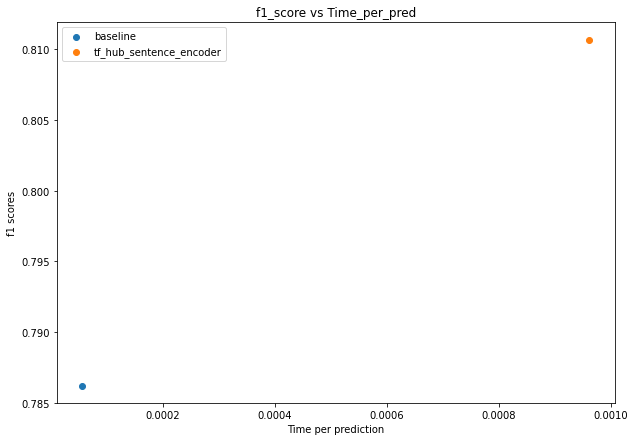

In [122]:
# Plot the timers
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.scatter(baseline_model_time_per_pred, baseline_results["model_f1score"], label= "baseline")
plt.scatter(model_6_time_per_pred, model_6_results["model_f1score"], label=  "tf_hub_sentence_encoder")
plt.legend()
plt.xlabel("Time per prediction")
plt.ylabel("f1 scores")
plt.title("f1_score vs Time_per_pred")

In [123]:
baseline_results

{'model_accuracy': 0.7926509186351706,
 'model_precision': 0.8111390004213173,
 'model_recall': 0.7926509186351706,
 'model_f1score': 0.7862189758049549}

In [124]:
model_6_results

{'model_accuracy': 0.8123359580052494,
 'model_precision': 0.8148798668657973,
 'model_recall': 0.8123359580052494,
 'model_f1score': 0.810686575717776}

# Exercises
1. Rebuild, compile and train model_1, model_2 and model_5 using the Keras Sequential API instead of the Functional API.
2. Retrain the baseline model with 10% of the training data. How does perform compared to the Universal Sentence Encoder model with 10% of the training data?
3. Try fine-tuning the TF Hub Universal Sentence Encoder model by setting training=True when instantiating it as a Keras layer.
We can use this encoding layer in place of our text_vectorizer and embedding layer

sentence_encoder_layer = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4",
                                        input_shape=[],
                                        dtype=tf.string,
                                        trainable=True) # turn training on to fine-tune the TensorFlow Hub model
4. Retrain the best model you've got so far on the whole training set (no validation split). Then use this trained model to make predictions on the test dataset and format the predictions into the same format as the sample_submission.csv file from Kaggle (see the Files tab in Colab for what the sample_submission.csv file looks like). Once you've done this, make a submission to the Kaggle competition, how did your model perform?
5. Combine the ensemble predictions using the majority vote (mode), how does this perform compare to averaging the prediction probabilities of each model?
6. Make a confusion matrix with the best performing model's predictions on the validation set and the validation ground truth labels.

In [141]:
model_11 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,), dtype=tf.string),
    TextVectorization(max_tokens = 10000,standardize= "lower_and_strip_punctuation",split = "whitespace",
                                    ngrams = None,output_mode = "int",output_sequence_length = 15),
    layers.Embedding(input_dim=10000, output_dim=128, embeddings_initializer= "uniform",
                     input_length= 15, name= "embedding_layer"),
    layers.GlobalAveragePooling1D(),                 
    layers.Dense(1, activation= "sigmoid", name= "output_layer")
])

In [142]:
model_11.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 text_vectorization_3 (TextV  (None, 15)               0         
 ectorization)                                                   
                                                                 
 embedding_layer (Embedding)  (None, 15, 128)          1280000   
                                                                 
 global_average_pooling1d_2   (None, 128)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
 output_layer (Dense)        (None, 1)                 129       
                                                                 
Total params: 1,280,129
Trainable params: 1,280,129
Non-trainable params: 0
_________________________________________________________________


In [143]:
model_11.compile(loss="binary_crossentropy",
                 optimizer= tf.keras.optimizers.Adam(),
                 metrics= ["accuracy"])